In [1]:
import pandas as pd
from my_utils import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [3]:
conn = connect_mysql()
query = 'select * from lol_datas'
df = pd.DataFrame(sql_execute_dict(conn,query))
conn.close()

In [4]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25',
       'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'summoner1Id', 'summoner2Id', 'turretKills', 'firstTowerKill',
       'totalMinionsKilled', 'pentaKills', 'championId', 'pickTurn'],
      dtype='object')

In [5]:
len(df)

50150

# 점멸 d일때 f일때 승률

In [6]:
tmp = df[['teamPosition','championName','summoner1Id', 'summoner2Id','win']].rename(columns={'summoner1Id':'spell_D','summoner2Id':'spell_F'})

In [7]:
tmp

,teamPosition,championName,spell_D,spell_F,win
0,TOP,Jax,4,12,False
1,JUNGLE,Taliyah,4,11,False
2,MIDDLE,Leblanc,12,4,False
3,BOTTOM,Ezreal,4,7,False
4,UTILITY,Xerath,21,4,False
...,...,...,...,...,...
50145,TOP,Cassiopeia,12,4,True
50146,JUNGLE,Hecarim,11,6,True
50147,MIDDLE,Sylas,4,14,True
50148,BOTTOM,Aphelios,4,6,True


In [8]:
tmp[tmp.win =='True']

,teamPosition,championName,spell_D,spell_F,win
5,TOP,Garen,4,14,True
6,JUNGLE,Graves,4,11,True
7,MIDDLE,Ahri,12,4,True
8,BOTTOM,Vayne,6,4,True
9,UTILITY,Milio,7,4,True
...,...,...,...,...,...
50145,TOP,Cassiopeia,12,4,True
50146,JUNGLE,Hecarim,11,6,True
50147,MIDDLE,Sylas,4,14,True
50148,BOTTOM,Aphelios,4,6,True


In [9]:
tmp['win'] = tmp.apply(lambda x:1 if x.win == 'True' else 0,axis=1)

In [10]:
tmp

,teamPosition,championName,spell_D,spell_F,win
0,TOP,Jax,4,12,0
1,JUNGLE,Taliyah,4,11,0
2,MIDDLE,Leblanc,12,4,0
3,BOTTOM,Ezreal,4,7,0
4,UTILITY,Xerath,21,4,0
...,...,...,...,...,...
50145,TOP,Cassiopeia,12,4,1
50146,JUNGLE,Hecarim,11,6,1
50147,MIDDLE,Sylas,4,14,1
50148,BOTTOM,Aphelios,4,6,1


In [11]:
tmp_d=tmp[tmp.spell_D=='4']
tmp_f=tmp[tmp.spell_F=='4']

In [12]:
tmp_win=tmp_d[tmp_d.win== 1]
tmp_win2=tmp_f[tmp_f.win== 1]

In [13]:
D_winrate=round(len(tmp_win)/len(tmp_d)*100,2)
F_winrate=round(len(tmp_win2)/len(tmp_f)*100,2)

In [14]:
D_winrate

49.88

In [15]:
F_winrate 

50.08

In [16]:
# -----------------------------------------------------------------

# 라인별 벤율 TOP3

In [100]:
df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,item5,item6,summoner1Id,summoner2Id,turretKills,firstTowerKill,totalMinionsKilled,pentaKills,championId,pickTurn
0,KR_6664833049,1526,13.16.525.6443,X X X X X X X,262,1,Jax,12690,TOP,100,...,3161,3340,4,12,1,True,170,0,126,1
1,KR_6664833049,1526,13.16.525.6443,미날린,382,2,Taliyah,10392,JUNGLE,100,...,6655,3364,4,11,0,False,26,0,895,2
2,KR_6664833049,1526,13.16.525.6443,미드탑정글중급봇,432,3,Leblanc,12702,MIDDLE,100,...,3020,3340,12,4,2,False,191,0,55,3
3,KR_6664833049,1526,13.16.525.6443,질 때도 있는거지,376,4,Ezreal,10530,BOTTOM,100,...,3035,3363,4,7,1,False,191,0,950,4
4,KR_6664833049,1526,13.16.525.6443,vi2vim,400,5,Xerath,6664,UTILITY,100,...,3108,3364,21,4,0,False,20,0,35,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50145,KR_6884662342,1650,13.24.547.9214,패배를못배운사람,99,6,Cassiopeia,20026,TOP,200,...,3116,3364,12,4,4,False,242,0,497,6
50146,KR_6884662342,1650,13.24.547.9214,카레브,468,7,Hecarim,14182,JUNGLE,200,...,0,3364,11,6,1,False,20,0,7,7
50147,KR_6884662342,1650,13.24.547.9214,뽀빠삐삐뿌삐,107,8,Sylas,14113,MIDDLE,200,...,3020,3364,4,14,1,False,158,0,266,8
50148,KR_6884662342,1650,13.24.547.9214,지존타락천사북방코끼리바다표범,102,9,Aphelios,14977,BOTTOM,200,...,0,3363,4,6,5,True,218,0,163,9


In [17]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25',
       'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'summoner1Id', 'summoner2Id', 'turretKills', 'firstTowerKill',
       'totalMinionsKilled', 'pentaKills', 'championId', 'pickTurn'],
      dtype='object')

In [59]:
blue_df = df[df.teamId == 100]  #블루팀
red_df = df[df.teamId == 200]   #레드팀

In [60]:
blue_df = team_df[['gameId','championName','teamPosition','championId','teamId']]
red_df = team_df2[['gameId','championName','teamPosition','championId','teamId']]

In [61]:
blue_df

,gameId,championName,teamPosition,championId,teamId
0,KR_6664833049,Jax,TOP,126,100
1,KR_6664833049,Taliyah,JUNGLE,895,100
2,KR_6664833049,Leblanc,MIDDLE,55,100
3,KR_6664833049,Ezreal,BOTTOM,950,100
4,KR_6664833049,Xerath,UTILITY,35,100
...,...,...,...,...,...
50140,KR_6884662342,Akali,TOP,238,100
50141,KR_6884662342,Rammus,JUNGLE,876,100
50142,KR_6884662342,Yasuo,MIDDLE,895,100
50143,KR_6884662342,Lucian,BOTTOM,63,100


In [62]:
red_df

,gameId,championName,teamPosition,championId,teamId
5,KR_6664833049,Garen,TOP,39,200
6,KR_6664833049,Graves,JUNGLE,238,200
7,KR_6664833049,Ahri,MIDDLE,22,200
8,KR_6664833049,Vayne,BOTTOM,421,200
9,KR_6664833049,Milio,UTILITY,360,200
...,...,...,...,...,...
50145,KR_6884662342,Cassiopeia,TOP,497,200
50146,KR_6884662342,Hecarim,JUNGLE,7,200
50147,KR_6884662342,Sylas,MIDDLE,266,200
50148,KR_6884662342,Aphelios,BOTTOM,163,200


In [ ]:
# 진영 별 championId(벤픽 챔피언)를 groupby 후 count 하여 cnt(벤픽 횟수) 총합 구하기

In [63]:
blue_tmp=blue_df[['championId','teamId']].groupby('championId').count().rename(columns={'teamId':'cnt'})

In [65]:
red_tmp=red_df[['championId','teamId']].groupby('championId').count().rename(columns={'teamId':'cnt'})

In [67]:
cnt_blue = blue_tmp.sort_values(by = 'cnt',ascending = False)  # cnt(벤픽 총횟수 내림차순으로 보기)

In [68]:
cnt_red = red_tmp.sort_values(by = 'cnt',ascending = False)    # cnt(벤픽 총횟수 내림차순으로 보기)

In [69]:
cnt_blue

,cnt
championId,
53,1912
48,924
24,909
517,907
64,858
...,...
147,3
267,2
13,2


In [70]:
cnt_red

,cnt
championId,
53,1860
517,914
48,908
24,878
64,828
...,...
1,2
96,2
32,1


In [31]:
import requests

In [32]:
url = f'https://ddragon.leagueoflegends.com/cdn/13.24.1/data/ko_KR/champion.json' 

In [33]:
res = requests.get(url).json()

In [34]:
data  = res['data']  

In [85]:
data

{'Aatrox': {'version': '13.24.1',
  'id': 'Aatrox',
  'key': '266',
  'name': '아트록스',
  'title': '다르킨의 검',
  'blurb': '한때는 공허에 맞서 싸웠던 슈리마의 명예로운 수호자 아트록스와 그의 종족은 결국 공허보다 위험한 존재가 되어 룬테라의 존속을 위협했지만, 교활한 필멸자의 마법에 속아넘어가 패배하게 되었다. 수백 년에 걸친 봉인 끝에, 아트록스는 자신의 정기가 깃든 마법 무기를 휘두르는 어리석은 자들을 타락시키고 육신을 바꾸는 것으로 다시 한번 자유의 길을 찾아내었다. 이제 이전의 잔혹한 모습을 닮은 육체를 차지한 아트록스는 세상의 종말과 오랫동안 기다려온 복수를...',
  'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
  'image': {'full': 'Aatrox.png',
   'sprite': 'champion0.png',
   'group': 'champion',
   'x': 0,
   'y': 0,
   'w': 48,
   'h': 48},
  'tags': ['Fighter', 'Tank'],
  'partype': '피의 샘',
  'stats': {'hp': 650,
   'hpperlevel': 114,
   'mp': 0,
   'mpperlevel': 0,
   'movespeed': 345,
   'armor': 38,
   'armorperlevel': 4.45,
   'spellblock': 32,
   'spellblockperlevel': 2.05,
   'attackrange': 175,
   'hpregen': 3,
   'hpregenperlevel': 1,
   'mpregen': 0,
   'mpregenperlevel': 0,
   'crit': 0,
   'critperlevel': 0,
   'attackdamage': 60,
   'attackd

In [35]:
dic = {}

In [36]:
for i in data : 
    dic[data[i]['key']] = data[i]['name']

In [37]:
cp_df = [dic]
new_df = pd.DataFrame(cp_df)
champion_df = new_df.transpose().reset_index()
champion_df.columns = ['championId','championName']

In [38]:
champion_df = champion_df.astype({'championId':'int'})  # ex) '100' -> 100

In [51]:
champion_df

,championId,championName
0,266,아트록스
1,103,아리
2,84,아칼리
3,166,아크샨
4,12,알리스타
...,...,...
161,221,제리
162,115,직스
163,26,질리언
164,142,조이


In [71]:
blue_ban = pd.merge(cnt_blue,champion_df,on='championId') # 데이터 병합

In [72]:
blue_ban['per']= round(blue_ban['cnt']/len(blue_df),4)*100  #(cnt(벤픽수) / len(blue_df)(경기수))*100 = 벤율

In [73]:
blue_ban=blue_ban.head(5)  # 벤율 상위 챔프 5개 출력

In [74]:
blue_ban

,championId,cnt,championName,per
0,53,1912,블리츠크랭크,7.62
1,48,924,트런들,3.68
2,24,909,잭스,3.62
3,517,907,사일러스,3.62
4,64,858,리 신,3.42


In [75]:
red_ban = pd.merge(cnt_red,champion_df,on='championId')

In [76]:
red_ban['per']= round(red_ban['cnt']/len(red_df),4)*100

In [77]:
red_ban=red_ban.head(5)

In [78]:
red_ban

,championId,cnt,championName,per
0,53,1860,블리츠크랭크,7.42
1,517,914,사일러스,3.65
2,48,908,트런들,3.62
3,24,878,잭스,3.50
4,64,828,리 신,3.30


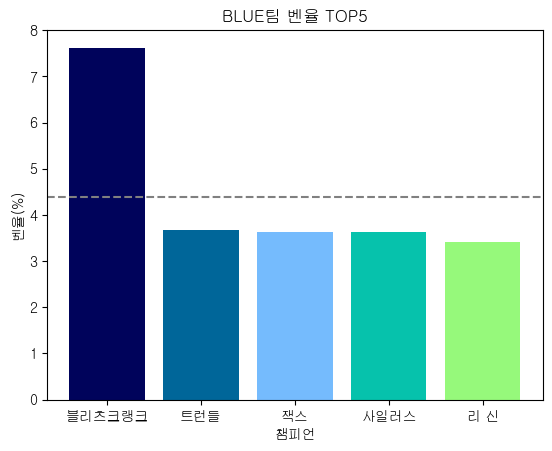

In [99]:
plt.figure()
plt.bar(blue_ban.championName,blue_ban.per,color =['#00035b','#006699','#75bbfd','#06c2ac','#96f97b'])
plt.xlabel('챔피언')
plt.ylabel('벤율(%)')
plt.title('BLUE팀 벤율 TOP5')

mean_val = blue_ban.per.mean()
plt.axhline(y = mean_val, color = 'gray',linestyle = 'dashed')

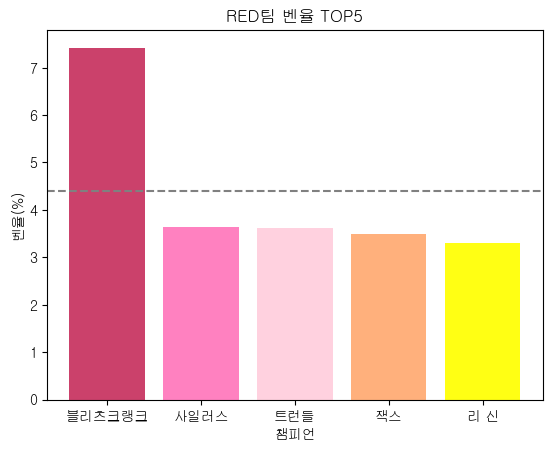

In [82]:
plt.figure()
plt.bar(red_ban.championName,red_ban.per,color =['#cb416b','#ff81c0','#ffd1df','#ffb07c','#ffff14'])
plt.xlabel('챔피언')
plt.ylabel('벤율(%)')
plt.title('RED팀 벤율 TOP5')

mean_val = blue_ban.per.mean()
plt.axhline(y = mean_val, color = 'gray',linestyle = 'dashed')

In [101]:
df.to_csv("lol_datas.csv", index = False)